In [983]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [984]:
ticker = yf.Ticker('AAPL')

In [985]:
ticker.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [986]:
df = yf.download('AAPL', period = '1y')

/tmp/ipython-input-3257723184.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', period = '1y')
[*********************100%***********************]  1 of 1 completed


In [987]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600
2024-10-23,229.691010,234.050724,226.704907,232.995637,52287000


In [988]:
df.shape

(251, 5)

## Visualization

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

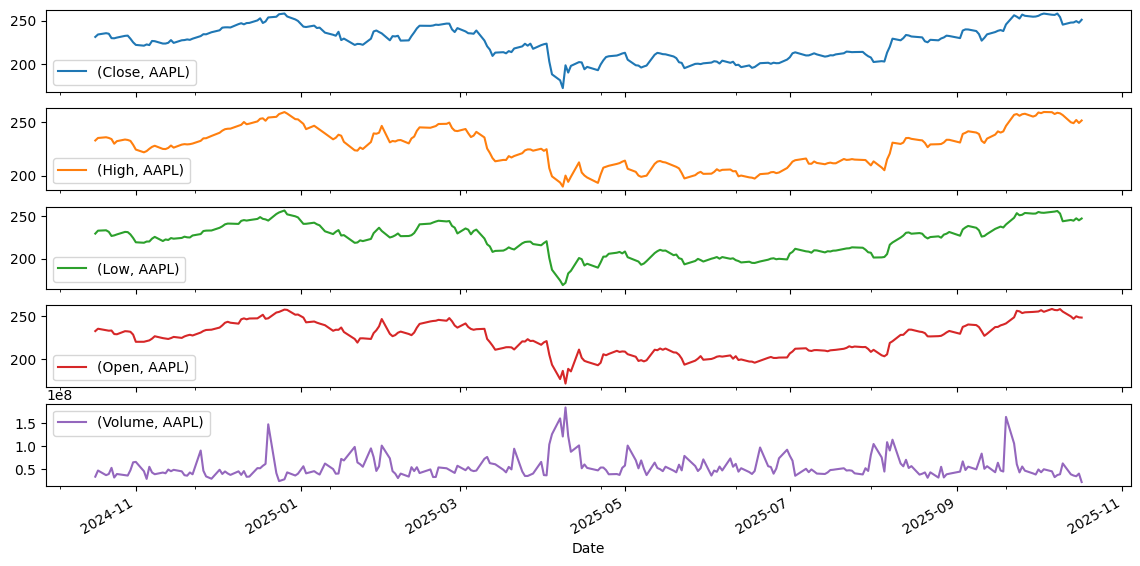

In [989]:
df.plot(figsize = (14,7) , subplots = True)

In [990]:
# adding tommorow column:

df['Tomorrow'] = df['Close'].shift(-1)

In [991]:
df.head()

Price,Close,High,Low,Open,Volume,Tomorrow
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,233.911362
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,235.384506
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,234.767395
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,229.691010
2024-10-23,229.691010,234.050724,226.704907,232.995637,52287000,229.501892


In [992]:
df.dropna(inplace = True)

In [993]:
df.shape

(250, 6)

## Basic model pre feature engineering

In [994]:
features = df.drop('Tomorrow',axis = 1,inplace = False).columns
features

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [995]:
x = df[features]
y = df['Tomorrow']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
'''
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
# from sklearn.preprocessing import MinMaxScaler
# y_min,y_max = y.min(),y.max()
# scaler = MinMaxScaler(feature_range=(y_min,y_max))#
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
# y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))

from sklearn.preprocessing import MinMaxScaler
y_min,y_max = y.min(),y.max()
# scaler = MinMaxScaler(feature_range=(y_min,y_max))
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.fit_transform(y_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.fit_transform(y_test.values.reshape(-1,1))

In [996]:
import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score


In [997]:
model  = Sequential([
    Dense(256, activation = 'relu',input_shape = (5,), name = 'input_hidden_layer'),
    Dropout(0.2),
    Dense(64, activation = 'relu', name = "hidden_layer_1"),
    Dropout(0.1),
    # Dense(16, activation = 'leaky_relu', name = "hidden_layer_2"),
    Dense(1, activation = 'relu', name = 'output_layer')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_hidden_layer (Dense)      │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,049 (70.50 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 0 (0.00 B)

In [998]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
    )

In [999]:
model.fit(
    x_train_scaled,y_train_scaled,
    epochs = 32,
    batch_size = 48,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - loss: 0.2913 - mae: 0.4968 - val_loss: 0.0865 - val_mae: 0.2749
Epoch 2/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0464 - mae: 0.1761 - val_loss: 0.0063 - val_mae: 0.0707
Epoch 3/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0272 - mae: 0.1310 - val_loss: 0.0309 - val_mae: 0.1717
Epoch 4/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0362 - mae: 0.1564 - val_loss: 0.0045 - val_mae: 0.0589
Epoch 5/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mae: 0.0959 - val_loss: 0.0061 - val_mae: 0.0649
Epoch 6/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mae: 0.0860 - val_loss: 0.0140 - val_mae: 0.1079
Epoch 7/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - mae: 0.1017 - val_loss: 0.0094 - val_mae: 0.0860
Epoch 8/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mae: 0.0865 - val_loss: 0.0024 - val_mae: 0.0388
Epoch 9/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mae: 0.0765 -

In [1000]:
test_loss, test_accuracy = model.evaluate(x_test_scaled,y_test_scaled, verbose = 0)
print(f'test_accuracy = {test_accuracy:.4f}\ntest loss: {test_loss:.4f}')


test_accuracy = 0.0644
test loss: 0.0062


In [1001]:
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import r2_score
print(f"r2 score = {r2_score(y_test_scaled, y_pred)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
r2 score = 0.9032100563208696


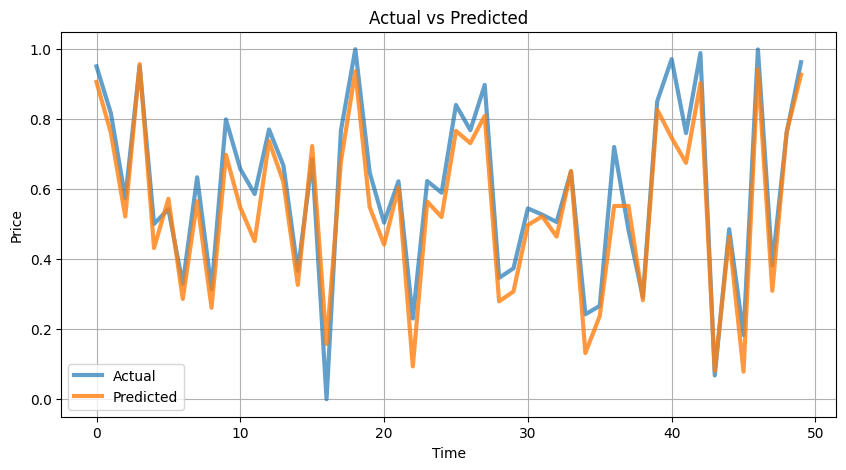

In [1002]:
plt.figure(figsize=(10,5))
plt.plot(y_test_scaled, linewidth = 3, alpha = 0.7,label = "Actual")
plt.plot(y_pred,linewidth = 3, alpha = 0.8, label = "Predicted")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

## Feature engineering and Model calling

In [1003]:
features = df.copy()
print(features.shape)
features.head()

(250, 6)


Price,Close,High,Low,Open,Volume,Tomorrow
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-10-17,231.074570,232.766707,229.452131,232.348639,32993800,233.911362
2024-10-18,233.911362,235.085888,232.925942,235.085888,46431500,235.384506
2024-10-21,235.384506,235.752803,233.363911,233.363911,36254500,234.767395
2024-10-22,234.767395,235.125728,231.522502,232.806520,38846600,229.691010
2024-10-23,229.691010,234.050724,226.704907,232.995637,52287000,229.501892


In [1004]:
def moving_average(df, window):
    return df['Close'].rolling(window=window).mean()
def exponential_moving_average(df, span):
    return df['Close'].ewm(span=span, adjust=False).mean()
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))
def bollinger_bands(df, window=20):
    ma = df['Close'].rolling(window).mean()
    std = df['Close'].rolling(window).std()
    upper_band = ma + (std * 2)
    lower_band = ma - (std * 2)
    return upper_band, lower_band
def average_true_range(df, period=14):
    if len(df) < period:
        return pd.Series(index=df.index, dtype=float)

    high_low = df['High'] - df['Low']
    high_close = np.abs(df['High'] - df['Close'].shift())
    low_close = np.abs(df['Low'] - df['Close'].shift())

    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)

    return true_range.ewm(alpha=1/period, adjust=False).mean()
def rate_of_change(df, period=5):
    return df['Close'].pct_change(periods=period)



In [1005]:
features['MA20'] = moving_average(features, 20)
features['MA50'] = moving_average(features, 50)
features['EMA20'] = exponential_moving_average(features, 20)
features['RSI14'] = calculate_rsi(features)
features['BB_upper'], features['BB_lower'] = bollinger_bands(features, 20)
features['ATR14'] = average_true_range(features, 14)
features['ROC5'] = rate_of_change(features, 5)
print(features.isnull().sum())
features.dropna(inplace = True)
features.head()

Price     Ticker
Close     AAPL       0
High      AAPL       0
Low       AAPL       0
Open      AAPL       0
Volume    AAPL       0
Tomorrow             0
MA20                19
MA50                49
EMA20                0
RSI14               13
BB_upper            19
BB_lower            19
ATR14                0
ROC5                 5
dtype: int64


Price,Close,High,Low,Open,Volume,Tomorrow,MA20,MA50,EMA20,RSI14,BB_upper,BB_lower,ATR14,ROC5
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,
Date,,,,,,,,,,,,,,
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300,251.307877,247.645377,235.975155,247.732206,69.300660,259.813288,235.477465,4.036520,0.023219
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500,249.534180,248.386246,236.379821,248.072746,58.382069,259.448563,237.323928,4.092687,-0.008998
2024-12-31,249.534180,252.384064,248.547676,251.547039,39480700,242.987427,248.925831,236.692277,248.211930,53.982601,259.017756,238.833905,4.074380,-0.018999
2025-01-02,242.987427,248.218856,240.964609,248.049444,55740700,242.499161,248.985619,236.844336,247.714359,46.576756,258.912402,239.058837,4.395465,-0.055577
2025-01-03,242.499161,243.316252,241.034359,242.499161,40244100,244.133347,249.003058,236.998971,247.217673,43.879736,258.880384,239.125731,4.244496,-0.060459


In [1006]:
# features = features.iloc[1:]
# features.head()

In [1007]:

target = features['Tomorrow']
features.drop('Tomorrow',axis = 1,inplace = True)
features.head()

Price,Close,High,Low,Open,Volume,MA20,MA50,EMA20,RSI14,BB_upper,BB_lower,ATR14,ROC5
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300,247.645377,235.975155,247.732206,69.300660,259.813288,235.477465,4.036520,0.023219
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500,248.386246,236.379821,248.072746,58.382069,259.448563,237.323928,4.092687,-0.008998
2024-12-31,249.534180,252.384064,248.547676,251.547039,39480700,248.925831,236.692277,248.211930,53.982601,259.017756,238.833905,4.074380,-0.018999
2025-01-02,242.987427,248.218856,240.964609,248.049444,55740700,248.985619,236.844336,247.714359,46.576756,258.912402,239.058837,4.395465,-0.055577
2025-01-03,242.499161,243.316252,241.034359,242.499161,40244100,249.003058,236.998971,247.217673,43.879736,258.880384,239.125731,4.244496,-0.060459


In [1008]:
# target = pd.DataFrame(target)
# target.head()

In [1009]:
x = features
y = target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, shuffle = False)
'''
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
from sklearn.preprocessing import MinMaxScaler
y_min,y_max = y.min(),y.max()
# scaler = MinMaxScaler(feature_range=(y_min,y_max))
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.fit_transform(y_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.fit_transform(y_test.values.reshape(-1,1))

In [1010]:
y_train_scaled.shape

(160, 1)

In [1011]:
x_train_scaled.shape

(160, 13)

In [1012]:
import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score


In [1013]:
model  = Sequential([
    Dense(256, activation = 'relu',input_shape = (13,), name = 'input_hidden_layer'),
    Dropout(0.2),
    Dense(64, activation = 'relu', name = "hidden_layer_1"),
    Dropout(0.1),
    Dense(16, activation = 'relu', name = "hidden_layer_2"),
    Dense(1, activation = 'relu', name = 'output_layer')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_hidden_layer (Dense)      │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,089 (82.38 KB)

 Trainable params: 21,089 (82.38 KB)

 Non-trainable params: 0 (0.00 B)

In [1014]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
    )

In [1015]:
model.fit(
    x_train_scaled,y_train_scaled,
    epochs = 32,
    batch_size = 48,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 0.3503 - mae: 0.5540 - val_loss: 0.2695 - val_mae: 0.5020
Epoch 2/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2565 - mae: 0.4576 - val_loss: 0.1206 - val_mae: 0.3308
Epoch 3/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1104 - mae: 0.2774 - val_loss: 0.0176 - val_mae: 0.1137
Epoch 4/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0240 - mae: 0.1207 - val_loss: 0.0144 - val_mae: 0.1077
Epoch 5/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0440 - mae: 0.1780 - val_loss: 0.0180 - val_mae: 0.1223
Epoch 6/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0408 - mae: 0.1687 - val_loss: 0.0042 - val_mae: 0.0556
Epoch 7/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0183 - mae: 0.1045 - val_loss: 0.0138 - val_mae: 0.0999
Epoch 8/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0163 - mae: 0.0968 - val_loss: 0.0277 - val_mae: 0.1486
Epoch 9/32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0232 - mae: 0.1125 -

In [1016]:
test_loss, test_accuracy = model.evaluate(x_test_scaled,y_test_scaled, verbose = 0)
print(f'test_accuracy = {test_accuracy:.4f}\ntest loss: {test_loss:.4f}')

test_accuracy = 0.1157
test loss: 0.0211


In [1017]:
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(y_test_scaled , y_pred)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
r2_score = 0.8016024133472062


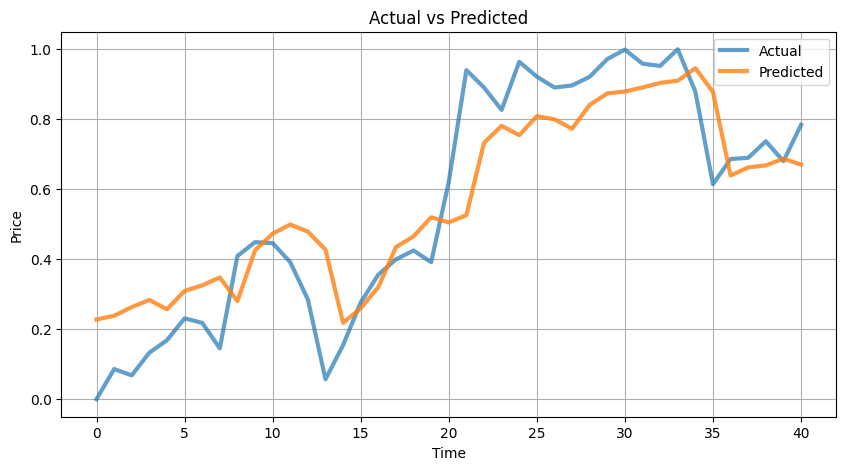

In [1018]:
plt.figure(figsize=(10,5))
plt.plot(y_test_scaled, linewidth = 3, alpha = 0.7,label = "Actual")
plt.plot(y_pred,linewidth = 3, alpha = 0.8, label = "Predicted")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# LSTM

In [1019]:
x_train_scaled.shape

(160, 13)

In [1020]:
# Function from GPT
def create_sequences(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])  # take all features
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Suppose you have:
# X = your data of shape (361, 13)
# y = target values of shape (361, )

time_steps = 1
x_train_reshaped, y_train_reshaped = create_sequences(x_train_scaled, y_train_scaled, time_steps)

print(x_train_reshaped.shape)

(159, 1, 13)


In [1021]:
lstm_model = Sequential([
    LSTM(512, input_shape=(x_train_reshaped.shape[1],x_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    # LSTM(16,return_sequences = True),
    # Dropout(0.2),
    LSTM(64),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [1022]:
lstm_model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

lstm_model.summary()

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                  │ (None, 1, 512)         │     1,077,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_70 (LSTM)                  │ (None, 1, 128)         │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,454,913 (5.55 MB)

 Trainable params: 1,454,913 (5.55 MB)

 Non-trainable params: 0 (0.00 B)

In [1023]:
lstm_model.fit(
    x_train_reshaped, y_train_reshaped,
    epochs = 128,
    batch_size = 16,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.3059 - mae: 0.5164 - val_loss: 0.2472 - val_mae: 0.4793
Epoch 2/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1219 - mae: 0.3062 - val_loss: 0.0099 - val_mae: 0.0866
Epoch 3/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0435 - mae: 0.1697 - val_loss: 0.0402 - val_mae: 0.1745
Epoch 4/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0205 - mae: 0.1181 - val_loss: 0.0299 - val_mae: 0.1447
Epoch 5/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - mae: 0.0841 - val_loss: 0.0103 - val_mae: 0.0902
Epoch 6/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mae: 0.0724 - val_loss: 0.0229 - val_mae: 0.1254
Epoch 7/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0102 - mae: 0.0743 - val_loss: 0.0161 - val_mae: 0.1096
Epoch 8/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - mae: 0.0587 - val_loss: 0.0160 - val_mae: 0.1090
Epoch 9/128
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0104 - mae: 

In [1024]:
x_test_reshaped,y_test_reshaped = create_sequences(x_test_scaled, y_test_scaled, time_steps)

In [1025]:
x_test_reshaped.shape

(40, 1, 13)

In [1026]:
test_loss, test_accuracy = lstm_model.evaluate(x_test_reshaped,y_test_reshaped, verbose = 0)
print(f'test_accuracy = {test_accuracy:.4f}\ntest loss: {test_loss:.4f}')

test_accuracy = 0.1675
test loss: 0.0386


In [1027]:
# Predict using the reshaped test data
y_pred = lstm_model.predict(x_test_reshaped)
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(y_test_reshaped, y_pred)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
r2_score = 0.6175751076799555


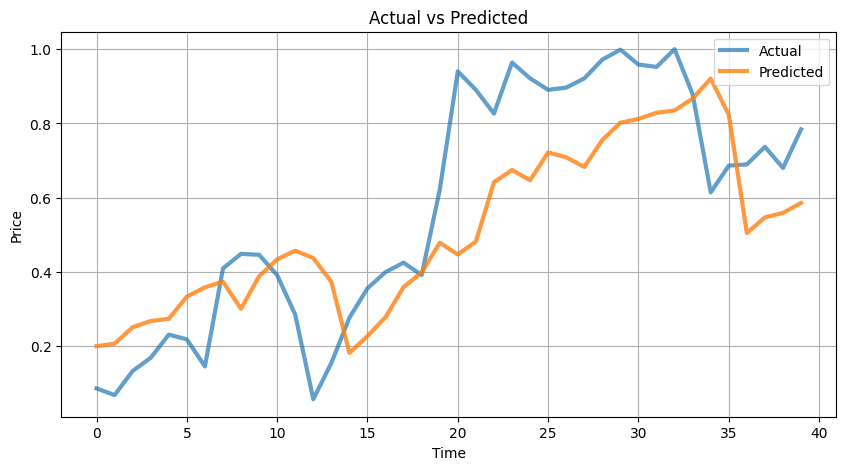

In [1028]:
plt.figure(figsize=(10,5))
plt.plot(y_test_reshaped, linewidth = 3, alpha = 0.7,label = "Actual")
plt.plot(y_pred,linewidth = 3, alpha = 0.8, label = "Predicted")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()